<a href="https://colab.research.google.com/github/norman02/Team-Awesome/blob/master/Team_Awesome_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Initialization

In [0]:
import pandas as pd
import numpy as np

col_names=["id",
           "amt_given_credit",  # amount of given credit
           "gender",            # 1=male; 2=female
           "education",         # 1=grad school; 2=uni; 3=high school; 4=others
           "marital",           # 1=married; 2=single; 3=others
           "age",               # age

           # histories of past payments
           # -1=pay duly; 1=payment delay one month; 2=payment delay two months
           # ... 8=payment delay eight months; 9=payment delay nine months+
           "hist_sept", "hist_august", "hist_july",
           "hist_june", "hist_may", "hist_april",

           # amount of billing statements
           "billed_sept", "billed_august", "billed_july",
           "billed_june", "billed_may", "billed_april",

           # amount of previous payment
           "prev_sept", "prev_august", "prev_july",
           "prev_june", "prev_may", "prev_april",

           # default payment; 1=yes; 2=no
           "is_default"]
data = pd.read_csv('https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv', header=0, names=col_names)

# the first column is the ID column, which we don't care about.
# the features are in columns 2 - 23
# the target variable is in the last column
X_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]

# Preprocessing and Data Analysis

In [0]:
print("Number of rows :", data.shape[0])
print("Number of columns :", data.shape[1])

#Storm: added null check
num_null = data.isnull().sum().values.sum()
print("There are "+ str(num_null) + " null values in the dataset.")

Number of rows : 30000
Number of columns : 25
There are 0 null values in the dataset.


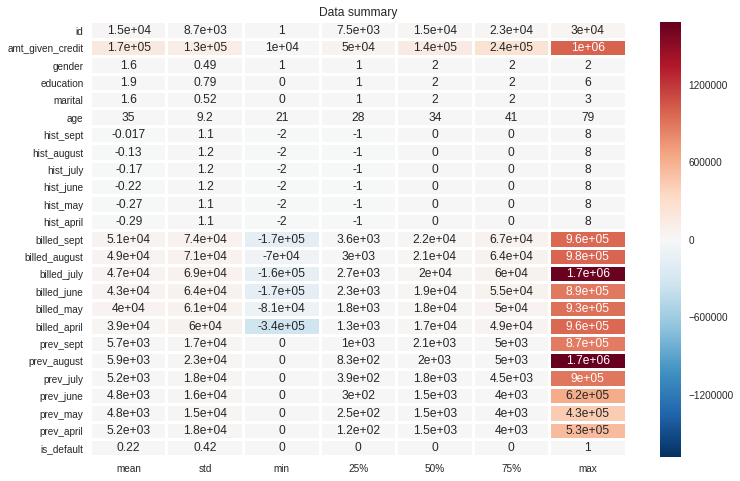

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# james: had issues getting the chart to generate with color, so I removed that part
sns.heatmap(data.describe()[1:].transpose(),
            annot=True, linecolor="w",
            linewidth=2,
            #cmap=sns.color_palette("Set2")
           )

plt.title("Data summary")
plt.show()

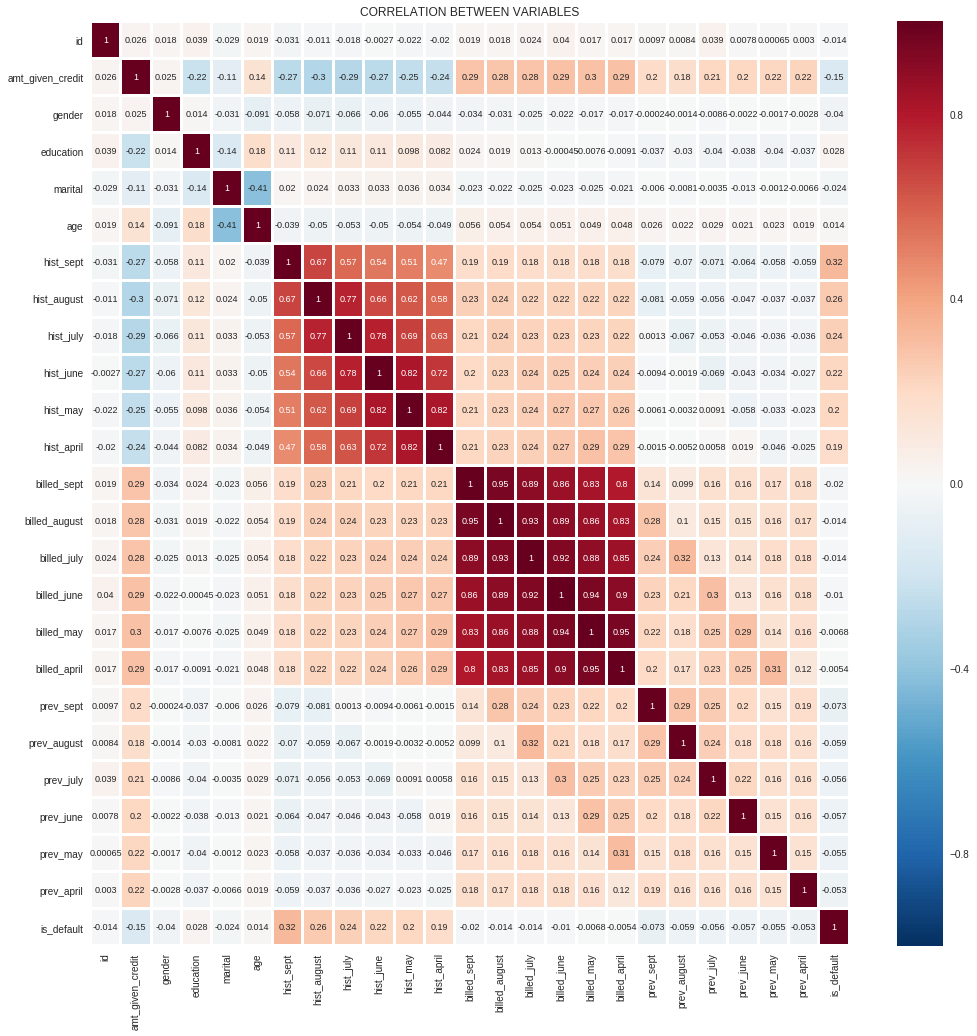

In [0]:
correlation = data.corr()
plt.figure(figsize=(17,17))
# james: had issues getting the chart to generate with color, so I removed that part
sns.heatmap(correlation, annot=True,
            # cmap=sns.color_palette("magma"),
            linewidth=2, edgecolor="k", annot_kws={'size': 9}) #storm: adjusted size so it's more legible
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

# some more basic feature selection
best_features = SelectKBest(score_func=mutual_info_classif, k=15)
feature_fit = best_features.fit(X_data, y_data)
feature_raw_scores = pd.DataFrame(feature_fit.scores_)
feature_cols = pd.DataFrame(X_data.columns)

feature_scores = pd.concat([feature_cols, feature_raw_scores], axis = 1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(15, 'Score'))

# Based on this, the following features are the most significant
X_reduced = X_data[['hist_sept', 'hist_august', 'hist_july', 'hist_june', 
                   'hist_may', 'hist_april', 'prev_sept', 'amt_given_credit',
                   'prev_april', 'prev_june', 'prev_may', 'prev_august',
                    'prev_july', 'billed_sept']]

             Feature     Score
5          hist_sept  0.075056
6        hist_august  0.046317
7          hist_july  0.039852
10        hist_april  0.032334
8          hist_june  0.031293
9           hist_may  0.028144
17         prev_sept  0.022675
19         prev_july  0.022151
18       prev_august  0.016836
0   amt_given_credit  0.016165
20         prev_june  0.015412
21          prev_may  0.014453
22        prev_april  0.012434
11       billed_sept  0.010700
2          education  0.009008


# Data Splitting

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X_data, y_data, test_size=0.2, random_state=1, stratify=y_data
)

# Model Prediction

## Linear Regression


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_lr_train_pred),
        r2_score(y_test, y_lr_test_pred)))

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_lr_train_pred),
        mean_squared_error(y_test, y_lr_test_pred)))
print ("Accuracy Score: ", accuracy_score(y_test, y_lr_test_pred))

R^2 train: 0.123, test: 0.126
MSE train: 0.151, test: 0.151


ValueError: ignored

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression();
log_reg.fit(X_train, y_train)
y_log_reg_train_pred = log_reg.predict(X_train)
y_log_reg_test_pred = log_reg.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_log_reg_train_pred),
        r2_score(y_test, y_log_reg_test_pred)))

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_log_reg_train_pred),
        mean_squared_error(y_test, y_log_reg_test_pred)))
print ("Accuracy Score: ", accuracy_score(y_test, y_log_reg_test_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


R^2 train: -0.284, test: -0.286
MSE train: 0.221, test: 0.222
Accuracy Score:  0.7785


## SVC

In [0]:
from sklearn.svm import SVC

svc = SVC(cache_size=1000)
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7788333333333334


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report # Added this. Shows accuracy, recall and precision.

# I'm thinking random forest is our best bet

pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier(n_estimators=100, criterion='gini'))

param_grid = [{'randomforestclassifier__n_estimators': [70, 75, 80, 85, 90, 95, 100]}]
gs = GridSearchCV(estimator=pipeline,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10, n_jobs=2)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.818125
{'randomforestclassifier__n_estimators': 80}


In [0]:
forest = RandomForestClassifier(n_estimators=80, criterion='gini')
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print ("Accuracy Score: ", accuracy_score(y_test, y_test_pred), "\n" )
print ("Classification report : \n", classification_report(y_test, y_test_pred))

#R2 is behaving differently then it did when I complained about it. I blame lack of sleep. Test R2 might indicate problem though IDK.
# negative R2 looks to be 'ok'-ish: https://stats.stackexchange.com/a/183279

R^2 train: 0.995, test: -0.057
MSE train: 0.001, test: 0.182
Accuracy Score:  0.818 

Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [0]:
#Discriminative Features - Storm
#Might be worth looking at assuming I implimented it correctly. 
#Maybe remove if we're using SelectKBest? May want to move this and SelectKBest up to pre-processing? 

from sklearn.model_selection import train_test_split

feature_labels = X_data.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("Random Forest features importances:")
for f in range(15):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

Random Forest features importances:
 1) hist_sept                      0.098330
 2) age                            0.066235
 3) billed_sept                    0.061416
 4) amt_given_credit               0.059153
 5) billed_august                  0.055124
 6) billed_july                    0.051625
 7) prev_sept                      0.051206
 8) billed_may                     0.050299
 9) billed_april                   0.050082
10) billed_june                    0.049458
11) prev_august                    0.048463
12) hist_august                    0.046237
13) prev_july                      0.046196
14) prev_april                     0.045732
15) prev_june                      0.043749


In [0]:
# Testing with smaller x_data. 

small_x = pd.DataFrame(X_data.hist_sept)
small_x['age'] = X_data.age
small_x['billed_sept'] = X_data.billed_sept
small_x['amt_given_credit'] = X_data.amt_given_credit

s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(small_x, y_data, test_size=0.2, random_state=1, stratify=y_data)

forest = RandomForestClassifier(n_estimators=100, criterion='gini')
forest.fit(s_X_train, s_y_train)

s_y_train_pred = forest.predict(s_X_train)
s_y_test_pred = forest.predict(s_X_test)

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(s_y_train, s_y_train_pred),
        r2_score(s_y_test, s_y_test_pred)))


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(s_y_train, s_y_train_pred),
        mean_squared_error(s_y_test, s_y_test_pred)))

R^2 train: 0.952, test: -0.249
MSE train: 0.008, test: 0.215
